// Result for BODY_25 (25 body parts consisting of COCO + foot)
// const std::map<unsigned int, std::string> POSE_BODY_25_BODY_PARTS {
//     {0,  "Nose"},
//     {1,  "Neck"},
//     {2,  "RShoulder"},
//     {3,  "RElbow"},
//     {4,  "RWrist"},
//     {5,  "LShoulder"},
//     {6,  "LElbow"},
//     {7,  "LWrist"},
//     {8,  "MidHip"},
//     {9,  "RHip"},
//     {10, "RKnee"},
//     {11, "RAnkle"},
//     {12, "LHip"},
//     {13, "LKnee"},
//     {14, "LAnkle"},
//     {15, "REye"},
//     {16, "LEye"},
//     {17, "REar"},
//     {18, "LEar"},
//     {19, "LBigToe"},
//     {20, "LSmallToe"},
//     {21, "LHeel"},
//     {22, "RBigToe"},
//     {23, "RSmallToe"},
//     {24, "RHeel"},
//     {25, "Background"}

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re

%matplotlib inline
# sns.set_context('paper', font_scale=1.5)

import os, glob
from pathlib import Path
from scipy import stats, interpolate, signal

In [2]:
#for interactive plots
%matplotlib notebook

In [3]:
datapath = Path('C:/openpose/output/')

In [4]:
os.listdir(datapath)

['1004', '1009', '1023', '1039', '1043', '1044', '1052', '1054', '1056']

## Process multiple users / task

In [4]:
df = pd.DataFrame()

for subj in os.listdir(datapath): #loop through subjects
    filepath = datapath / subj
    posefiles = os.listdir(filepath)
    tasks = [p.split('_')[0] for p in posefiles]; cycles = [c.split('_')[1] for c in posefiles]
    tasks = np.unique(tasks); cycles = np.unique(cycles)
#     print(subj, tasks, cycles)
    
    for task in tasks:
        for cycle in cycles:
            print(subj, task, cycle)        
            posefiles = glob.glob((filepath / (task+'_'+str(cycle))).as_posix()+'*')
            posefiles = [Path(p) for p in posefiles] 
            
            if len(posefiles) > 0:
                print(posefiles[0])
            
                for file in posefiles:
                    with open(file) as f:
                        try:
                            data = json.load(f)
                        except(UnicodeDecodeError):
                            print('cannot parse ',str(file))

                    person = 0 #for now use first person detected (need to be updated)
                    
                    #frame nr
                    str1 = file.as_posix()
                    match = re.search(r'\d+_keypoints',str1)
                    if match:                        
                        frame_nr = int(re.findall('\d+',match.group())[0])
                    else:
                        print('missing frame')
                        frame_nr = -1

                    pose = data['people'][person]['pose_keypoints_2d']
                    pose_hand_L = data['people'][person]['hand_left_keypoints_2d']
                    pose_hand_R = data['people'][person]['hand_right_keypoints_2d']
                    d = {'SubjID':subj, 'Task':task, 'cycle':cycle,
                         'elbR_x':pose[9], 'elbR_y':pose[10], 'elbR_c':pose[11], 'wriR_x':pose[12], 'wriR_y':pose[13], 'wriR_c':pose[14], 
                         'elbL_x':pose[18], 'elbL_y':pose[19], 'elbL_c':pose[20], 'wriL_x':pose[21], 'wriL_y':pose[22], 'wriL_c':pose[23],
                         'nose_x':pose[0], 'nose_y':pose[1], 'nose_c':pose[2], 'neck_x':pose[3], 'neck_y':pose[4], 'neck_c':pose[5],
                         'midHip_x':pose[24], 'midHip_y':pose[25], 'midHip_c':pose[26],
                         'thumbR_x':pose_hand_R[12], 'thumbR_y':pose_hand_R[13], 'thumbR_c':pose_hand_R[14],
                         'indexR_x':pose_hand_R[24], 'indexR_y':pose_hand_R[25], 'indexR_c':pose_hand_R[26],
                         'thumbL_x':pose_hand_L[12], 'thumbL_y':pose_hand_L[13], 'thumbL_c':pose_hand_L[14],
                         'indexL_x':pose_hand_L[24], 'indexL_y':pose_hand_L[25], 'indexL_c':pose_hand_L[26],                         
                         'Npeople':len(data['people'])
                }
                    df = pd.concat((df,pd.DataFrame(d, index=[frame_nr])))
            else:
                print('No pose files found')
                
df['SubjID']=df.SubjID.astype(int)
df['cycle']=df.cycle.astype(int)

#save data
df.to_csv('../Metadata/Poses.csv',index=True)

1004 FtnL 1
C:\openpose\output\1004\FtnL_1_000000000000_keypoints.json
1004 FtnL 3
C:\openpose\output\1004\FtnL_3_000000000000_keypoints.json
1004 FtnR 1
C:\openpose\output\1004\FtnR_1_000000000000_keypoints.json
1004 FtnR 3
C:\openpose\output\1004\FtnR_3_000000000000_keypoints.json
1004 RamL 1
C:\openpose\output\1004\RamL_1_000000000000_keypoints.json
1004 RamL 3
C:\openpose\output\1004\RamL_3_000000000000_keypoints.json
1004 RamR 1
C:\openpose\output\1004\RamR_1_000000000000_keypoints.json
1004 RamR 3
No pose files found
1004 SitStand 1
C:\openpose\output\1004\SitStand_1_000000000000_keypoints.json
1004 SitStand 3
C:\openpose\output\1004\SitStand_3_000000000000_keypoints.json
1009 FtnL 1
C:\openpose\output\1009\FtnL_1_000000000000_keypoints.json
1009 FtnL 3
C:\openpose\output\1009\FtnL_3_000000000000_keypoints.json
1009 FtnR 1
C:\openpose\output\1009\FtnR_1_000000000000_keypoints.json
1009 FtnR 3
C:\openpose\output\1009\FtnR_3_000000000000_keypoints.json
1009 RamL 1
C:\openpose\outpu

IndexError: list index out of range

In [5]:
#load data
df = pd.read_csv('../Metadata/Poses.csv')
df.rename(columns={'Unnamed: 0':'frame#'}, inplace=True)
df.set_index(df['frame#'], inplace=True)
df.drop(['frame#'], axis=1, inplace=True)
df.head()

,SubjID,Task,cycle,elbR_x,elbR_y,elbR_c,wriR_x,wriR_y,wriR_c,elbL_x,...,indexR_x,indexR_y,indexR_c,thumbL_x,thumbL_y,thumbL_c,indexL_x,indexL_y,indexL_c,Npeople
frame#,,,,,,,,,,,,,,,,,,,,,
0,1004,FtnL,1,329.352,329.357,0.899764,360.768,385.545,0.824514,463.882,...,382.909,434.640,0.861225,542.777,236.062,0.155607,545.704,240.565,0.093997,3
1,1004,FtnL,1,329.346,328.036,0.889666,360.735,381.679,0.862279,465.103,...,381.813,432.987,0.883224,534.912,256.269,0.369207,540.038,254.486,0.064129,3
2,1004,FtnL,1,329.380,324.163,0.856091,360.758,380.347,0.878291,465.108,...,381.377,429.680,0.884750,534.644,254.132,0.374593,542.145,250.722,0.113782,3
3,1004,FtnL,1,329.406,318.941,0.898018,360.764,376.411,0.820703,465.154,...,381.085,425.569,0.853273,534.341,248.438,0.511668,540.824,247.321,0.435721,3
4,1004,FtnL,1,329.426,313.724,0.841354,360.779,371.164,0.881449,465.153,...,381.580,420.072,0.826076,529.243,245.872,0.426455,539.982,243.587,0.102082,3


In [6]:
# bodyparts = list(df.columns)
# bodyparts = [b for b in bodyparts if ('R' in b or 'L' in b) and ('_c' not in b)]
# bodyparts

# Plot FTNR tasks for all users

In [298]:
# s = '1004'
# dfs = df.query('SubjID == @s & Task=="FtnR"')

# #remove outliers 
# L = (np.sqrt( (dfs.midHip_x -dfs.neck_x)**2 + (dfs.midHip_y-dfs.neck_y)**2) ) #trunk length
# sns.distplot(L)
# z = np.abs(stats.zscore(L)) 
# # plt.hist(z)
# # plt.hist(L[z<3]) #remove outliers
# # sns.plot()
# # plt.hist(z)

# # L.plot(kind='box')

In [98]:
# wriR = np.sqrt(dfs.wriR_x**2 + dfs.wriR_y**2)
# wriL = np.sqrt(dfs.wriL_x**2 + dfs.wriL_y**2)
# indexR = np.sqrt(dfs.indexR_x**2 + dfs.indexR_y**2)
# indexL = np.sqrt(dfs.indexL_x**2 + dfs.indexL_y**2)
# thumbR = np.sqrt(dfs.thumbR_x**2 + dfs.thumbR_y**2)
# thumbL = np.sqrt(dfs.thumbL_x**2 + dfs.thumbL_y**2)

<IPython.core.display.Javascript object>


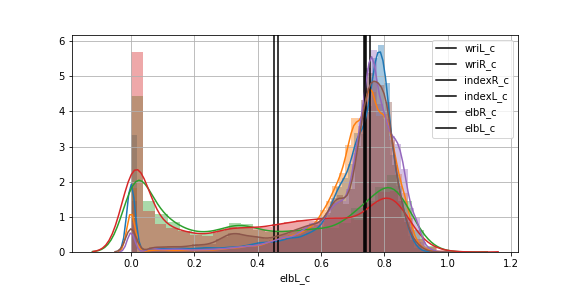

In [20]:
joints = ['wriL_c', 'wriR_c', 'indexR_c', 'indexL_c', 'elbR_c', 'elbL_c']
plt.figure(figsize=(8,4))
for j in joints:
    plt.axvline(df[j].median(), c='k')
    sns.distplot(df[j])
plt.legend(joints)
plt.grid()

In [6]:
def plot_joint_trajectory(task='FtnR', subjs='All', cycle=1, size=8, colormap=False):
    
    markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
    T = 400
    frame_rate = 29 #pretty much the same across movies

    if subjs == 'All':
        subjs = df.SubjID.unique()
        
    fig, ax = plt.subplots(3,2, sharex=True, figsize=(12,12))
    ax = ax.ravel()
    
    for si, s in enumerate(subjs):

        dfs = df.query('SubjID == @s & Task==@task & cycle==1').copy()    
        dfs = dfs[:T]

        #normalization factor (hip length)    
        L = (np.sqrt( (dfs.midHip_x -dfs.neck_x)**2 + (dfs.midHip_y-dfs.neck_y)**2) ) #trunk length (ref length)
        t = dfs.index/frame_rate
        
        #without colormap
        if colormap == False:
#             ax[0].scatter(t[:T], (dfs.wriL_x - dfs.nose_x)/L, s=size, alpha=0.6); ax[0].set_title('wrist L')
#             ax[1].scatter(t[:T], (dfs.wriR_x - dfs.nose_x)/L, s=size, alpha=0.6); ax[1].set_title('wrist R')
#             ax[2].scatter(t[:T], (dfs.indexL_x - dfs.nose_x)/L, s=size, alpha=0.6); ax[2].set_title('index L')
#             ax[3].scatter(t[:T], (dfs.indexR_x - dfs.nose_x)/L, s=size, alpha=0.6); ax[3].set_title('index R')        
#             ax[4].scatter(t[:T], (dfs.elbL_x - dfs.nose_x)/L, s=size, alpha=0.6); ax[4].set_title('elbow L')
#             ax[5].scatter(t[:T], (dfs.elbR_x - dfs.nose_x)/L, s=size, alpha=0.6); ax[5].set_title('elbow R')
            
            ax[0].scatter(t[:T], (dfs.wriL_y - dfs.nose_y)/L, s=size, alpha=0.6); ax[0].set_title('wrist L')
            ax[1].scatter(t[:T], (dfs.wriR_y - dfs.nose_y)/L, s=size, alpha=0.6); ax[1].set_title('wrist R')
            ax[2].scatter(t[:T], (dfs.indexL_y - dfs.nose_y)/L, s=size, alpha=0.6); ax[2].set_title('index L')
            ax[3].scatter(t[:T], (dfs.indexR_y - dfs.nose_y)/L, s=size, alpha=0.6); ax[3].set_title('index R')        
            ax[4].scatter(t[:T], (dfs.elbL_y - dfs.nose_y)/L, s=size, alpha=0.6); ax[4].set_title('elbow L')
            ax[5].scatter(t[:T], (dfs.elbR_y - dfs.nose_y)/L, s=size, alpha=0.6); ax[5].set_title('elbow R')
        
        #with colormap for confidence
        else:
            ax[0].scatter(t[:T], (dfs.wriL_x - dfs.nose_x)/L, s=size, c=dfs.wriL_c, cmap='cool', marker=markers[si]); ax[0].set_title('wrist L')
            ax[1].scatter(t[:T], (dfs.wriR_x - dfs.nose_x)/L, s=size, c=dfs.wriR_c, cmap='cool',  marker=markers[si]); ax[1].set_title('wrist R')
            ax[2].scatter(t[:T], (dfs.indexL_x - dfs.nose_x)/L, s=size, c=dfs.indexL_c, cmap='cool',  marker=markers[si]); ax[2].set_title('index L')
            ax[3].scatter(t[:T], (dfs.indexR_x - dfs.nose_x)/L, s=size, c=dfs.indexR_c, cmap='cool',  marker=markers[si]); ax[3].set_title('index R')        
            ax[4].scatter(t[:T], (dfs.elbL_x - dfs.nose_x)/L, s=size, c=dfs.elbL_c, cmap='cool',  marker=markers[si]); ax[4].set_title('elbow L')
            ax[5].scatter(t[:T], (dfs.elbR_x - dfs.nose_x)/L, s=size, c=dfs.elbR_c, cmap='cool',  marker=markers[si]); ax[5].set_title('elbow R')

    for i in range(6):
        ax[i].grid()
        ax[i].legend(subjs)

### Example interpolations

In [7]:
s = 1009
task = 'FtnR'
dfs = df.query('SubjID == @s & Task==@task & cycle==1').copy()    
dfs.head()

,SubjID,Task,cycle,elbR_x,elbR_y,elbR_c,wriR_x,wriR_y,wriR_c,elbL_x,...,indexR_x,indexR_y,indexR_c,thumbL_x,thumbL_y,thumbL_c,indexL_x,indexL_y,indexL_c,Npeople
frame#,,,,,,,,,,,,,,,,,,,,,
0,1056,FtnR,1,674.512,497.863,0.728428,839.402,377.196,0.696031,1322.03,...,1027.860,233.467,0.532610,1169.09,985.376,0.762587,1207.48,990.861,0.295961,1
1,1056,FtnR,1,671.539,500.789,0.747332,836.498,380.136,0.735280,1316.12,...,997.438,236.920,0.635875,1166.07,983.540,0.779051,1204.36,990.663,0.301839,1
2,1056,FtnR,1,671.493,503.728,0.800565,836.301,380.112,0.716599,1310.30,...,991.895,241.117,0.527158,1160.99,982.403,0.750807,1200.85,993.918,0.347829,1
3,1056,FtnR,1,665.699,503.872,0.782568,827.601,383.175,0.716628,1307.24,...,989.497,240.847,0.499440,1157.46,982.173,0.707069,1196.98,993.847,0.415893,1
4,1056,FtnR,1,662.746,503.890,0.777196,824.578,386.071,0.749940,1304.23,...,974.945,244.230,0.756178,1156.52,982.009,0.736659,1192.45,992.787,0.372689,1


<IPython.core.display.Javascript object>


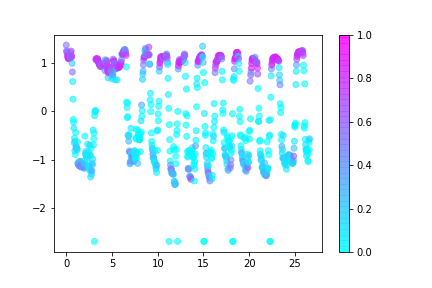

In [8]:
plt.scatter(dfs.index.values/30, stats.zscore(dfs.indexR_x), c=dfs.indexR_c, cmap='cool', alpha=0.6, vmin=0, vmax=1)
plt.colorbar()

<IPython.core.display.Javascript object>


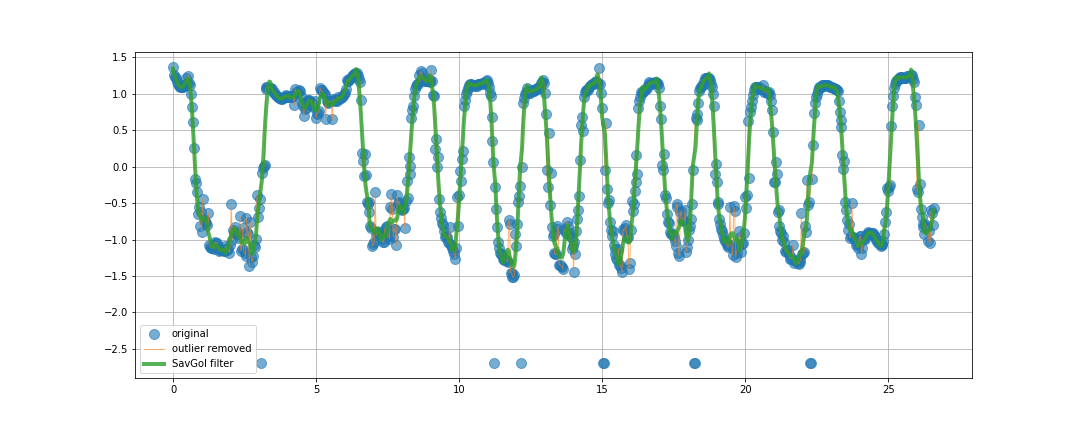

In [10]:
z = stats.zscore(dfs.indexR_x)
dfs['indexR_z'] = z
data = dfs[['indexR_z']].copy()
plt.figure(figsize=(15,6))
plt.plot(data.index.values/30, data['indexR_z'], 'o', Markersize=10, alpha=0.6, LineWidth=2, label='original')

#remove outliers
data = data[np.abs(data['indexR_z']) <2]
plt.plot(data.index.values/30, data['indexR_z'], '-', LineWidth=1, alpha=0.6, label='outlier removed')

# #apply filter
plt.plot(data.index.values/30, signal.savgol_filter(data['indexR_z'], 13, 2), '-', LineWidth=4, alpha=0.8, label='SavGol filter')

# plt.plot(data.index.values/30, signal.medfilt(data['indexR_z'], 13), '-', LineWidth=4, alpha=0.7, label='median filter')

plt.legend()
plt.grid()

In [40]:
def plot_joint_trajectory_norm(task='FtnR', subjs='All', cycle=1, size=8, colormap=False):
    
    markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
    joints = [ 'elbL_', 'elbR_', 'wriL_', 'wriR_', 'thumbL_', 'thumbR_','indexL_', 'indexR_',]
    p_joints = {} #trajectory for each joint (relative to reference point)
    frame_rate = 30 #pretty much the same across movies
    
    T = 10 #end plot time [s]
    d_threshold = 2 #max distance (from nose) above which a pose is discarded  
        
    if subjs == 'All':
        subjs = df.SubjID.unique()
        
    fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
    ax = ax.ravel()
    
    for si, s in enumerate(subjs):

        dfs = df.query('SubjID == @s & Task==@task & cycle==1').copy()    
        dfs = dfs[:int(T*frame_rate)]

        #normalization factor (hip length)    
        L = (np.sqrt( (dfs.midHip_x -dfs.neck_x)**2 + (dfs.midHip_y-dfs.neck_y)**2) ) #trunk length (ref length)
                
        for i, jj in enumerate(joints):
            if 'Ftn' in task:
                #Detrend data: distance from nose (ref point) normalized by trunk length
                p = (np.sqrt((dfs[jj+'x'] - dfs.nose_x)**2 + (dfs[jj+'y'] - dfs.nose_y)**2))/L 
                 
            elif 'Ram' in task:
                #Detrend: Only use vertical (x) distance from nose (or can use neck)
                p =  (dfs[jj+'x'] - dfs.nose_x)/L
                
            dfs[jj] = p
            dfs[jj] = stats.zscore(p)             #z-score data

            #outlier rejection
            data = dfs[np.abs(dfs[jj]) < d_threshold].copy() #arm joints distance constraint
        
            #filter 
            try:
                data[jj+'filt'] = signal.savgol_filter(data[jj], 13, 2)
            except(ValueError):
                print('missing ', s, jj, len(data[jj]))
                data[jj+'filt'] = data[jj]
                        
            t = data.index/frame_rate
            if colormap == False:
                ax[i].scatter(t, data[jj], s=size, alpha=0.6); 
#                 ax[i].plot(t, data[jj], LineWidth=.5)
#                 ax[i].plot(t, data[jj+'filt'], LineWidth=2)
            else:
                ax[i].scatter(t, data[jj], s=size, alpha=0.6, c=data[jj+'c'], cmap='cool', marker=markers[si], vmin=0, vmax=1); 
                
            ax[i].set_title(jj+task+str(cycle))
            p_joints.update({jj:p})    
                    
    for i in range(len(joints)):
        ax[i].grid()
        ax[i].legend(subjs)
        

## Ftn

<IPython.core.display.Javascript object>


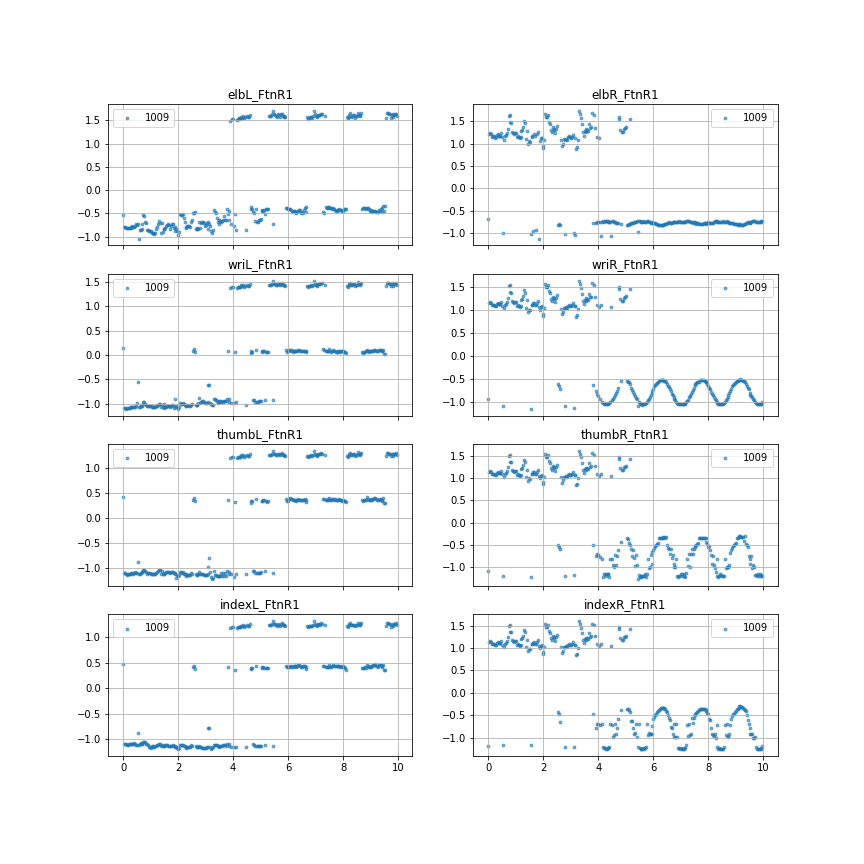

In [42]:
plot_joint_trajectory_norm('FtnR', ['1009'])
plt.savefig('../Figs/FtnR1_All.jpg', dpi=300)

Plot distance from nose

<IPython.core.display.Javascript object>


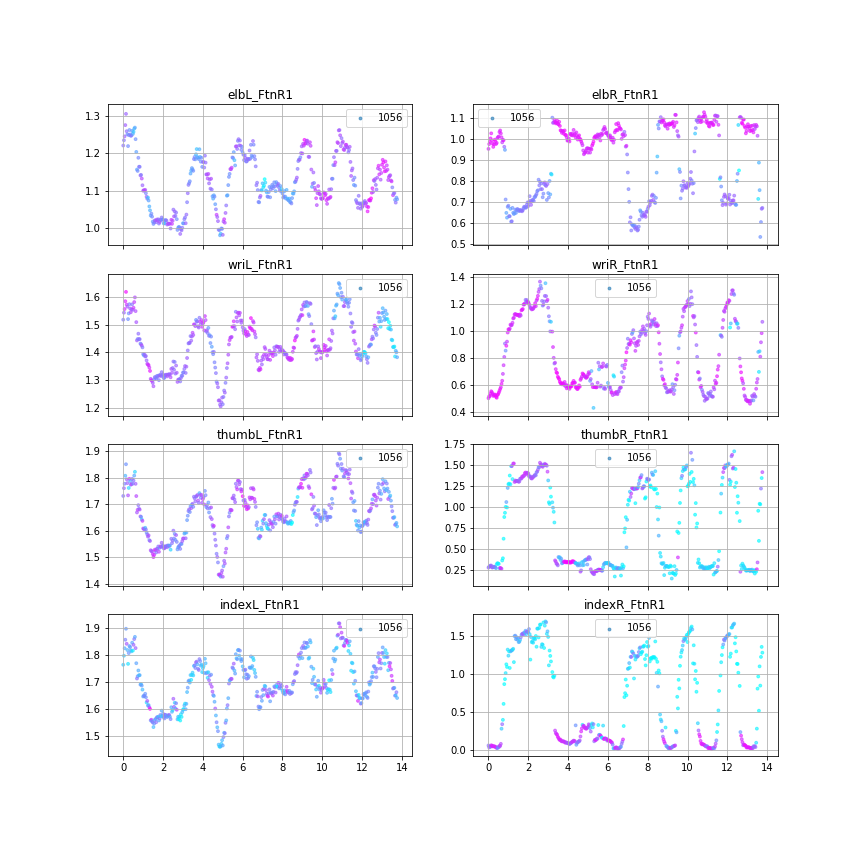

In [29]:
plot_joint_trajectory_norm('FtnR',['1056'], colormap=True)
plt.savefig('../Figs/1056_FtnR1.jpg', dpi=300)

## Ram

<IPython.core.display.Javascript object>


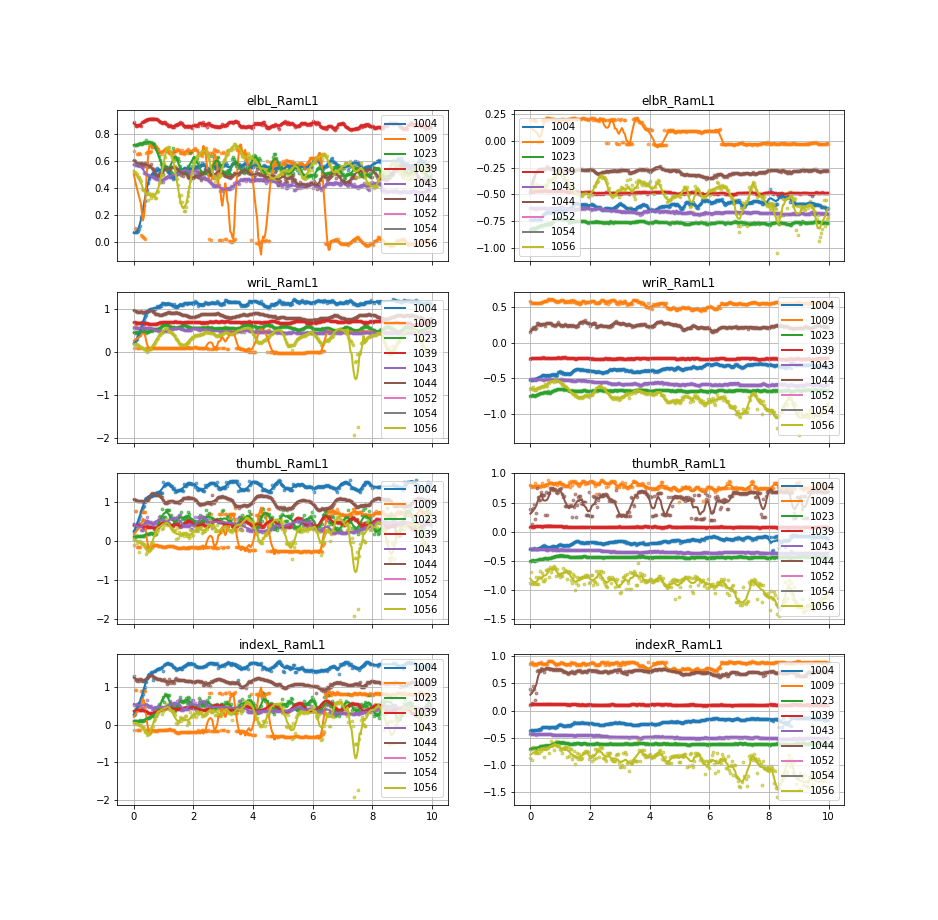

missing  1052 elbL_ 0
missing  1052 elbR_ 0
missing  1052 wriL_ 0
missing  1052 wriR_ 0
missing  1052 thumbL_ 0
missing  1052 thumbR_ 0
missing  1052 indexL_ 0
missing  1052 indexR_ 0
missing  1054 elbL_ 0
missing  1054 elbR_ 0
missing  1054 wriL_ 0
missing  1054 wriR_ 0
missing  1054 thumbL_ 0
missing  1054 thumbR_ 0
missing  1054 indexL_ 0
missing  1054 indexR_ 0


In [31]:
plot_joint_trajectory_norm('RamL')
plt.savefig('../Figs/RamL1_All.jpg', dpi=300)

<IPython.core.display.Javascript object>


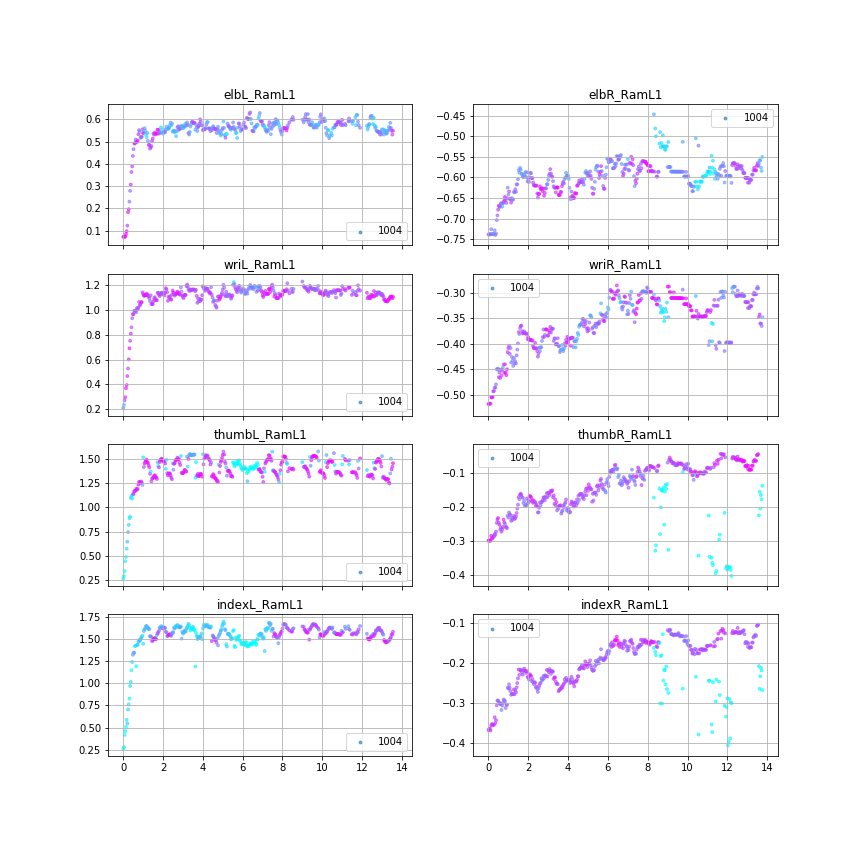

In [31]:
s = '1004'
task = 'RamL'
plot_joint_trajectory_norm(task,[s], colormap=True)
plt.savefig('../Figs/'+s+task+'1.jpg', dpi=300)

In [ ]:
#try different interpolation methods


In [121]:
# dfs = df.query('SubjID==1009 & Task=="FtnR" & cycle==1').copy()
# L = (np.sqrt( (dfs.midHip_x -dfs.neck_x)**2 + (dfs.midHip_y-dfs.neck_y)**2) ) #trunk length (ref length)
# p = (dfs.wriR_x - dfs.nose_x)/L
# z = stats.zscore(p)
# sns.distplot(z, bins=40)

Show only x-coordinates from nose

<IPython.core.display.Javascript object>


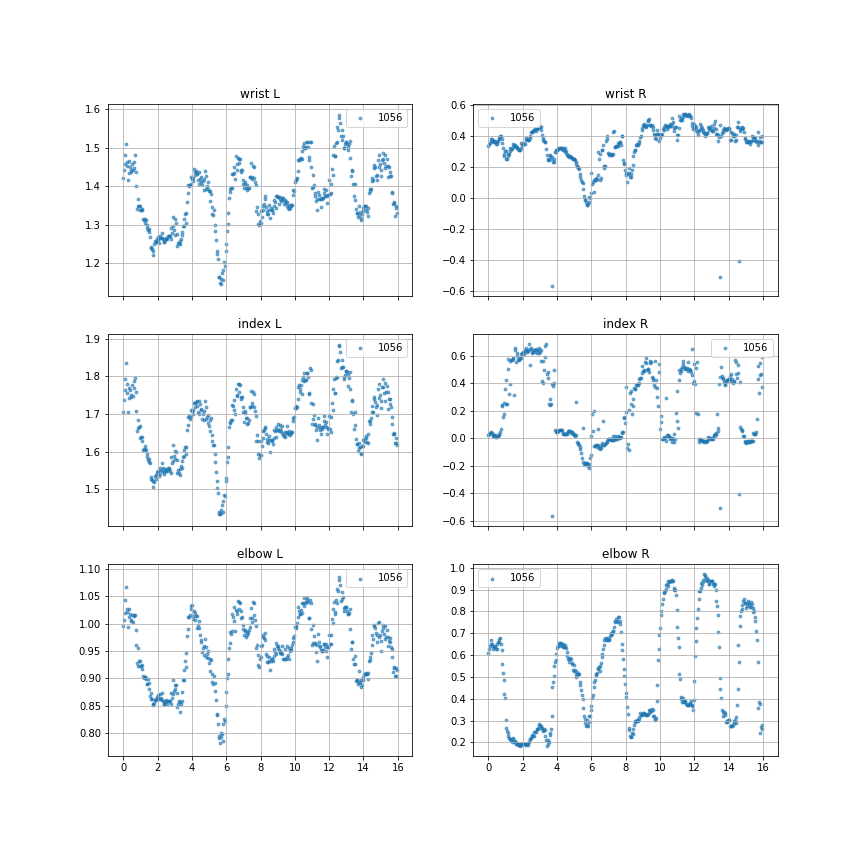

In [126]:
plot_joint_trajectory('FtnR',['1056'])
plt.savefig('../Figs/1056_FtnR1_x.jpg', dpi=300)
# plot_joint_trajectory('FtnR')

This person is moving their head during the task - therefore the left side joints show this change - could be used as a feature to detect motor symptoms?

<IPython.core.display.Javascript object>


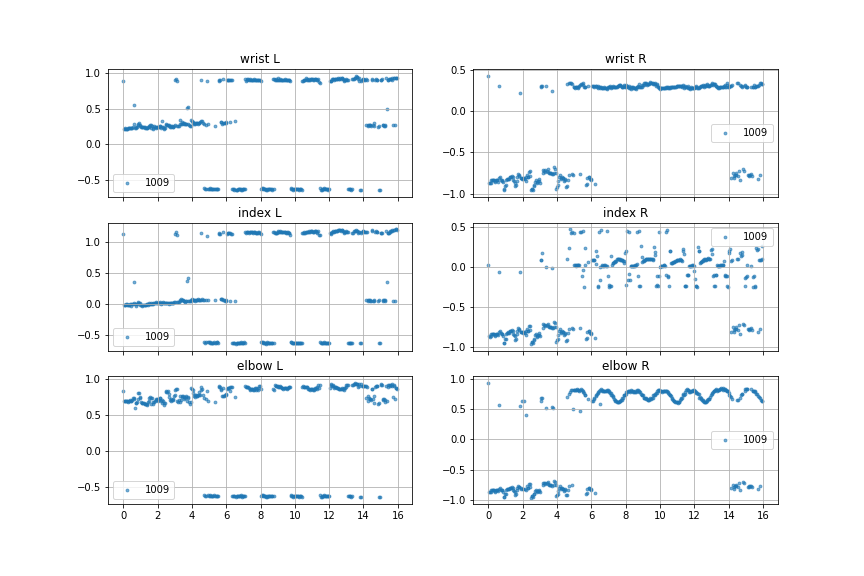

In [95]:
plot_joint_trajectory('FtnR',['1009'])
# plot_joint_trajectory('FtnR')

<IPython.core.display.Javascript object>


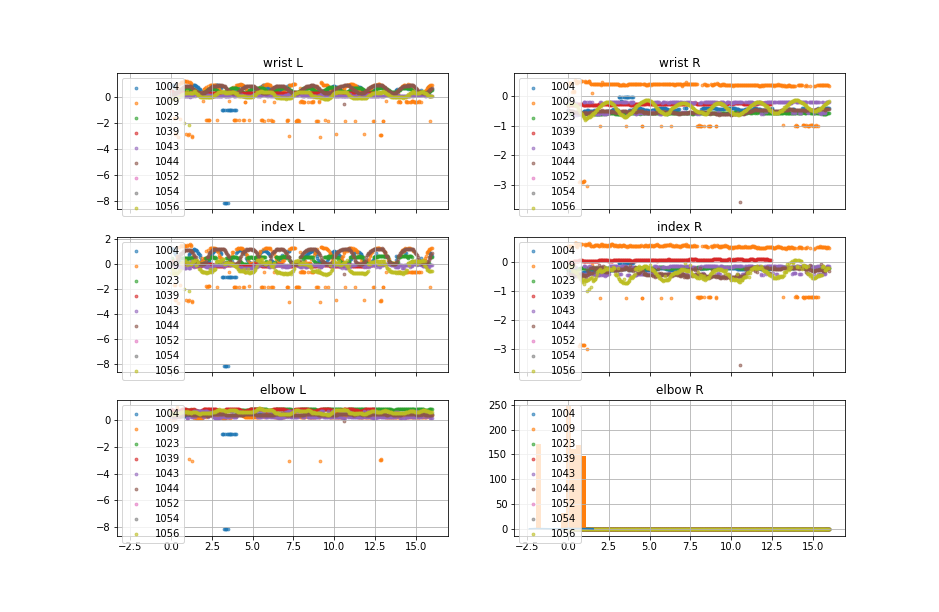

In [39]:
plot_joint_trajectory('FtnL')

## TO DO

### Missed detection problem
* Remove outliers: distribution of deltas (speeds)
* or remove detection with low confidence


<IPython.core.display.Javascript object>


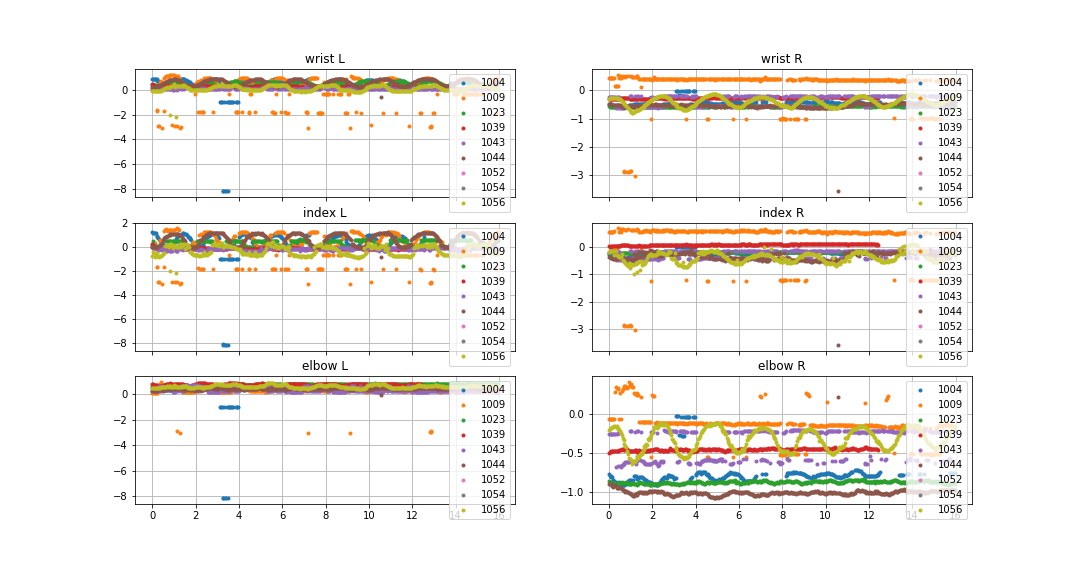

In [135]:
plot_joint_trajectory('FtnL')

<IPython.core.display.Javascript object>


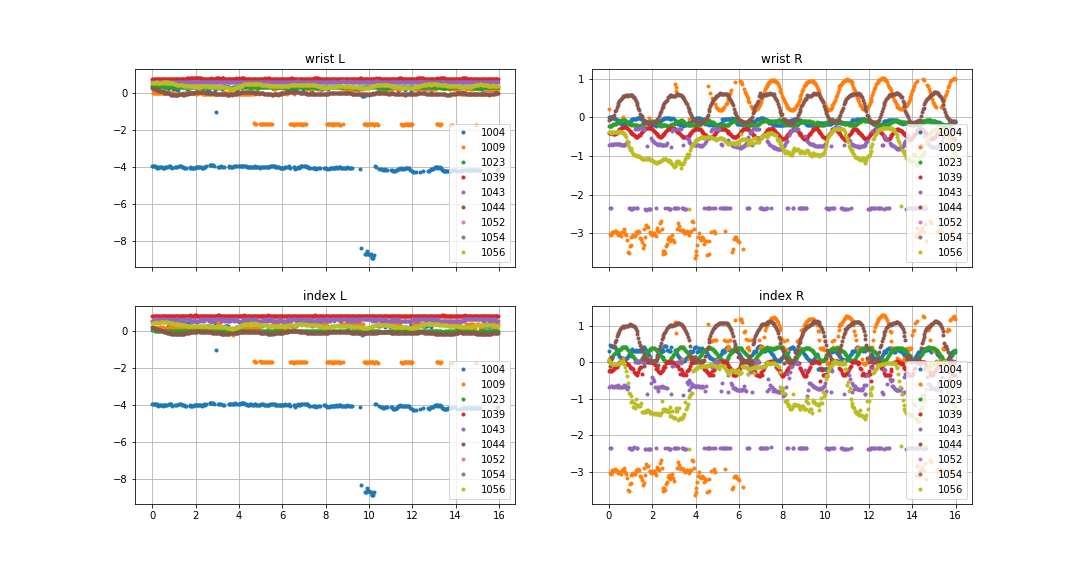

In [97]:
#list of bodyparts to normalize (for later)
bodyparts = list(df.columns)
bodyparts = [b for b in bodyparts if ('R' in b or 'L' in b) and ('_c' not in b)]
T = 400

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(15,8))
for s in df.SubjID.unique():
    
    dfs = df.query('SubjID == @s & Task=="FtnR" & cycle==1').copy()    
    dfs = dfs[:T]

    #normalization factor (hip length)    
    L = (np.sqrt( (dfs.midHip_x -dfs.neck_x)**2 + (dfs.midHip_y-dfs.neck_y)**2) ) #trunk length (ref length)
    t = dfs.index/25
        
    ax[0,0].plot(t[:T], (dfs.wriL_x - dfs.nose_x)/L ,'o', MarkerSize=3); ax[0,0].set_title('wrist L')
    ax[0,1].plot(t[:T], (dfs.wriR_x - dfs.nose_x)/L,'o', MarkerSize=3); ax[0,1].set_title('wrist R')
    ax[1,0].plot(t[:T], (dfs.indexL_x - dfs.nose_x)/L, 'o', MarkerSize=3 ); ax[1,0].set_title('index L')
    ax[1,1].plot(t[:T], (dfs.indexR_x - dfs.nose_x)/L,'o', MarkerSize=3 ); ax[1,1].set_title('index R')
    
ax = ax.ravel()
for i in range(4):
    ax[i].grid()
    ax[i].legend(df.SubjID.unique())

<IPython.core.display.Javascript object>


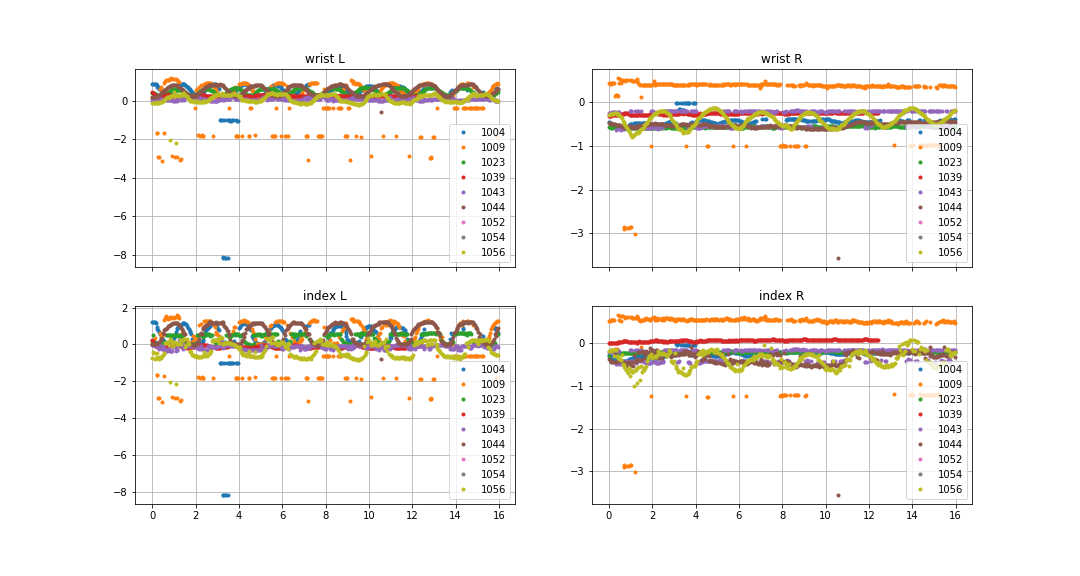

In [99]:
#list of bodyparts to normalize (for later)
bodyparts = list(df.columns)
bodyparts = [b for b in bodyparts if ('R' in b or 'L' in b) and ('_c' not in b)]
T = 400

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(15,8))
for s in df.SubjID.unique():
    
    dfs = df.query('SubjID == @s & Task=="FtnL" & cycle==1').copy()    
    dfs = dfs[:T]

    #normalization factor (hip length)    
    L = (np.sqrt( (dfs.midHip_x -dfs.neck_x)**2 + (dfs.midHip_y-dfs.neck_y)**2) ) #trunk length (ref length)
    t = dfs.index/25
        
    ax[0,0].plot(t[:T], (dfs.wriL_x - dfs.nose_x)/L ,'o', MarkerSize=3); ax[0,0].set_title('wrist L')
    ax[0,1].plot(t[:T], (dfs.wriR_x - dfs.nose_x)/L,'o', MarkerSize=3); ax[0,1].set_title('wrist R')
    ax[1,0].plot(t[:T], (dfs.indexL_x - dfs.nose_x)/L, 'o', MarkerSize=3 ); ax[1,0].set_title('index L')
    ax[1,1].plot(t[:T], (dfs.indexR_x - dfs.nose_x)/L,'o', MarkerSize=3 ); ax[1,1].set_title('index R')
    
ax = ax.ravel()
for i in range(4):
    ax[i].grid()
    ax[i].legend(df.SubjID.unique())

<IPython.core.display.Javascript object>


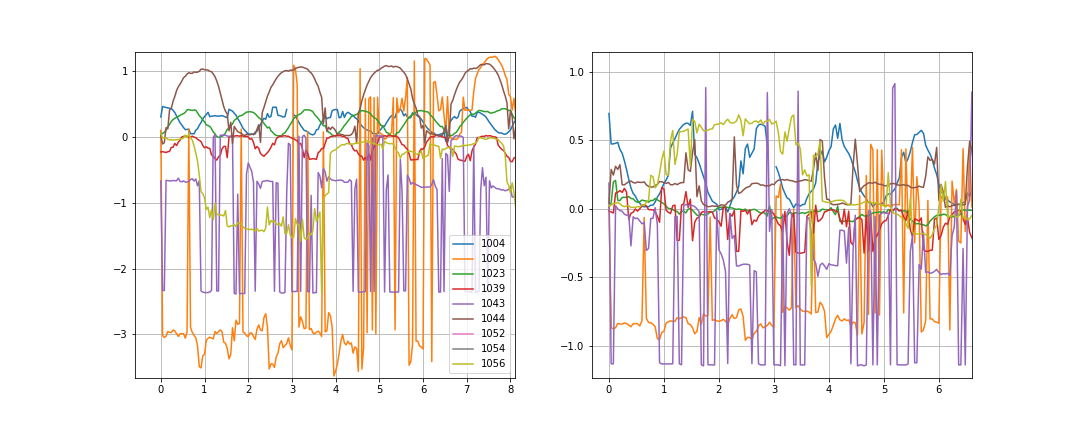

In [53]:
#list of bodyparts to normalize (for later)
bodyparts = list(df.columns)
bodyparts = [b for b in bodyparts if ('R' in b or 'L' in b) and ('_c' not in b)]

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15,6))
for s in df.SubjID.unique():
    s = str(s)
    dfs = df.query('SubjID == @s & Task=="FtnR" & cycle==1').copy()    
    L = (np.sqrt( (dfs.midHip_x -dfs.neck_x)**2 + (dfs.midHip_y-dfs.neck_y)**2) ) #trunk length (ref length)
    t = dfs.index/25
    ax1.plot(t, (dfs.indexR_x - dfs.nose_x)/L)
    ax2.plot(t, (dfs.indexR_y - dfs.nose_y)/L)
ax1.grid(); ax2.grid()
ax1.legend(df.SubjID.unique())

## Process single user / task

In [4]:
subj = '1004'
task = 'RamL'
cycle = 1
task = task+'_'+str(cycle)
filepath = datapath / subj
print(filepath)

C:\openpose\output\1004


In [128]:
data_files = os.listdir(filepath)
data_files[:5]

['FtnL_1_000000000000_keypoints.json',
 'FtnL_1_000000000001_keypoints.json',
 'FtnL_1_000000000002_keypoints.json',
 'FtnL_1_000000000003_keypoints.json',
 'FtnL_1_000000000004_keypoints.json']

In [131]:
posefiles = glob.glob((filepath / task).as_posix()+'*')
posefiles = [Path(p) for p in posefiles] 
print(posefiles[0])

C:\openpose\output\1004\RamL_1_000000000000_keypoints.json


In [132]:
with open(posefiles[0]) as f:
    data= json.load(f)

In [133]:
len((data['people'])) # 3 people identified in video frame

2

In [134]:
df = pd.DataFrame()
Npeople = []
for file in posefiles:
    with open(file) as f:
        try:
            data = json.load(f)
        except(UnicodeDecodeError):
            print('cannot parse ',str(file))
            
    Npeople.append(len(data['people']))
    person = 0
    pose = data['people'][person]['pose_keypoints_2d']
    pose_hand_L = data['people'][person]['hand_left_keypoints_2d']
    pose_hand_R = data['people'][person]['hand_right_keypoints_2d']
    d = {'elbR_x':pose[9], 'elbR_y':pose[10], 'elbR_c':pose[11], 'wriR_x':pose[12], 'wriR_y':pose[13], 'wriR_c':pose[14], 
         'elbL_x':pose[18], 'elbL_y':pose[19], 'elbL_c':pose[20], 'wriL_x':pose[21], 'wriL_y':pose[22], 'wriL_c':pose[23],
         'nose_x':pose[0], 'nose_y':pose[1], 'nose_c':pose[2], 
         'thumbR_x':pose_hand_R[12], 'thumbR_y':pose_hand_R[13], 'thumbR_c':pose_hand_R[14],
         'indexR_x':pose_hand_R[24], 'indexR_y':pose_hand_R[25], 'indexR_c':pose_hand_R[26],
         'thumbL_x':pose_hand_L[12], 'thumbL_y':pose_hand_L[13], 'thumbL_C':pose_hand_L[14],
         'indexL_x':pose_hand_L[24], 'indexL_y':pose_hand_L[25], 'indexL_c':pose_hand_L[26],
}
    df = pd.concat((df,pd.DataFrame(d, index=[0])))
    
df.reset_index(drop=True, inplace=True)
t = df.index/25
df.set_index(t, inplace=True)

In [135]:
data['people'][0].keys()

dict_keys(['person_id', 'pose_keypoints_2d', 'face_keypoints_2d', 'hand_left_keypoints_2d', 'hand_right_keypoints_2d', 'pose_keypoints_3d', 'face_keypoints_3d', 'hand_left_keypoints_3d', 'hand_right_keypoints_3d'])

In [136]:
df.head()

,elbR_x,elbR_y,elbR_c,wriR_x,wriR_y,wriR_c,elbL_x,elbL_y,elbL_c,wriL_x,...,thumbR_c,indexR_x,indexR_y,indexR_c,thumbL_x,thumbL_y,thumbL_C,indexL_x,indexL_y,indexL_c
0.00,346.376,214.561,0.855726,369.869,275.858,0.867179,432.471,181.946,0.858018,446.871,...,0.727908,385.696,312.234,0.333271,453.429,239.308,0.010885,452.526,240.888,0.006771
0.04,346.378,214.558,0.857908,369.858,275.828,0.866287,432.472,181.947,0.858410,449.478,...,0.730573,385.969,312.198,0.322596,456.005,240.078,0.010123,454.403,241.451,0.007988
0.08,346.374,214.556,0.858197,369.877,275.844,0.867750,432.500,181.943,0.860964,453.384,...,0.695404,385.996,311.354,0.333940,461.397,246.937,0.017116,469.021,250.524,0.008181
0.12,346.367,214.497,0.859585,369.865,275.831,0.865118,432.488,181.972,0.868896,456.025,...,0.711232,385.500,311.543,0.360925,472.192,250.438,0.072813,473.592,254.871,0.035328
0.16,346.352,213.280,0.852371,369.866,275.832,0.864910,432.558,183.182,0.878340,462.544,...,0.704232,385.516,311.963,0.384546,475.572,248.310,0.017975,477.500,248.310,0.010525


Text(0.5, 1.0, 'wrist y')

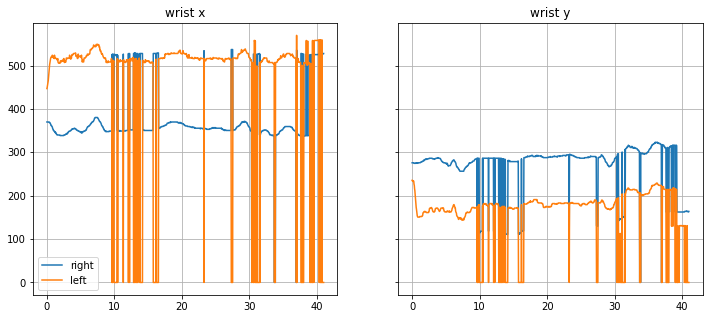

In [141]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12,5))
ax1.plot(df.wriR_x)
ax1.plot(df.wriL_x)
ax1.grid(); ax1.set_title('wrist x'); ax1.legend(['right','left'])
ax2.plot(df.wriR_y)
ax2.plot(df.wriL_y)
ax2.grid(); ax2.set_title('wrist y')

In [151]:
dfcopy = df.copy()
df = df.iloc[:125,:]

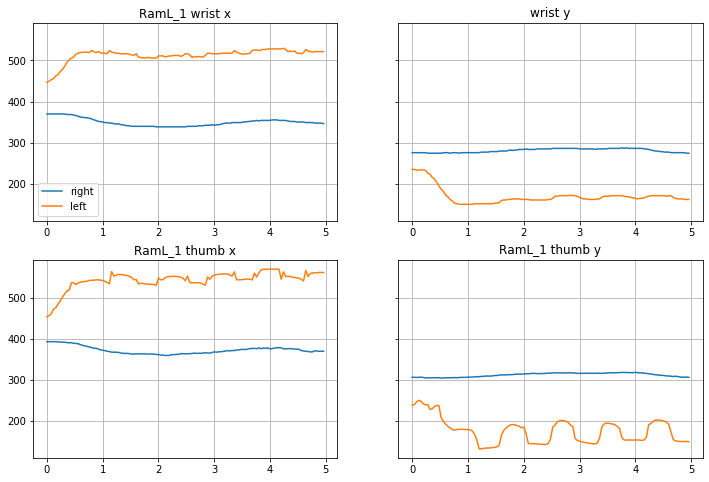

In [152]:
fig, ax = plt.subplots(2,2, sharey=True, figsize=(12,8))
ax1 = ax[0,0]; ax2 = ax[0,1]; ax3=ax[1,0]; ax4 = ax[1,1]
ax1.plot(df.wriR_x)
ax1.plot(df.wriL_x)
ax1.grid(); ax1.set_title(task + ' wrist x'); ax1.legend(['right','left'])
ax2.plot(df.wriR_y)
ax2.plot(df.wriL_y)
ax2.grid(); ax2.set_title('wrist y')
ax3.plot(df.thumbR_x)
ax3.plot(df.thumbL_x)
ax3.grid(); ax3.set_title(task + ' thumb x');
ax4.plot(df.thumbR_y)
ax4.plot(df.thumbL_y)
ax4.grid(); ax4.set_title(task + ' thumb y'); 


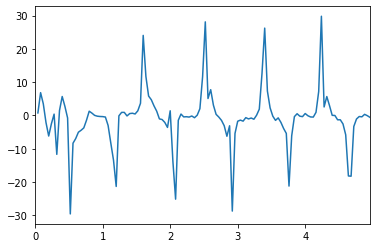

In [162]:
df.thumbL_y.diff().plot()

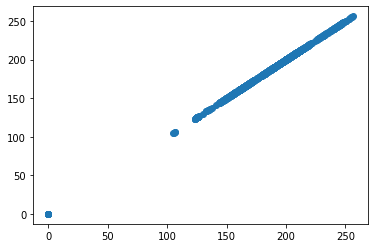

In [150]:
plt.scatter(df.thumbL_y, df.thumbL_y)

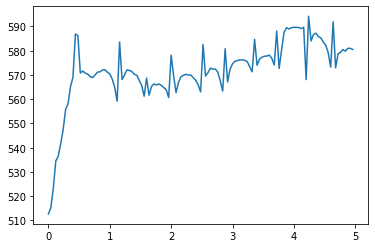

In [160]:
plt.plot(np.sqrt(df.thumbL_x**2 + df.thumbL_y**2))

Text(0.5, 1.0, 'index finger y')

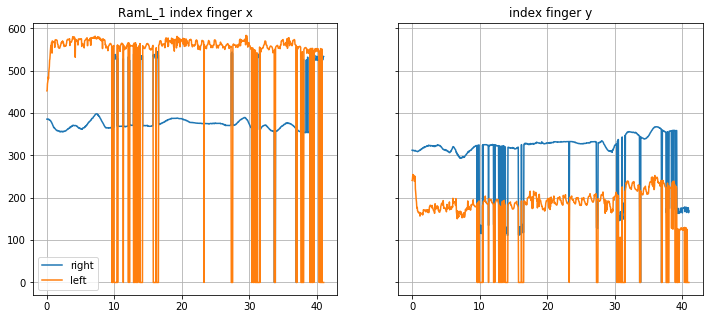

In [138]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12,5))
ax1.plot(df.thumbR_x)
ax1.plot(df.thumbL_x)
ax1.grid(); ax1.set_title(task + ' thumb x'); ax1.legend(['right','left'])
ax2.plot(df.indexR_y)
ax2.plot(df.indexL_y)
ax2.grid(); ax2.set_title('index finger y')

Text(0.5, 1.0, 'relative wrist y')

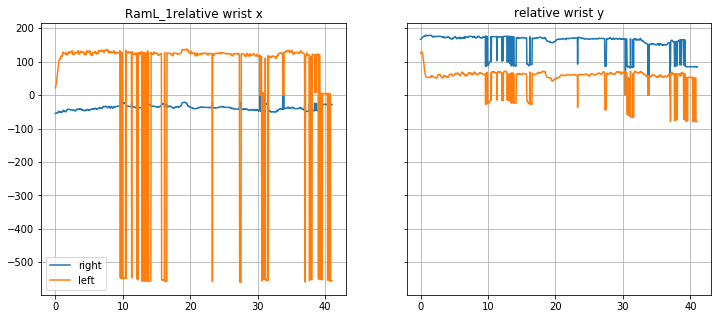

In [139]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12,5))
ax1.plot(df.wriR_x-df.nose_x)
ax1.plot(df.wriL_x-df.nose_x)
ax1.grid(); ax1.set_title(task + 'relative wrist x'); ax1.legend(['right','left'])
ax2.plot(df.wriR_y-df.nose_y)
ax2.plot(df.wriL_y-df.nose_y)
ax2.grid(); ax2.set_title('relative wrist y')

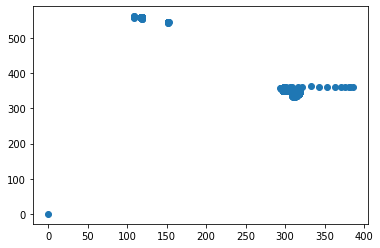

In [123]:
plt.scatter(df.wriR_y, df.wriR_x) #can remove outliers

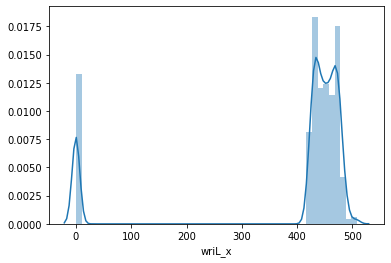

In [126]:
sns.distplot(df.wriL_x)

### Preliminary test

In [222]:
data_files[:4]

['Cycle2_edited_000000000000_keypoints.json',
 'Cycle2_edited_000000000001_keypoints.json',
 'Cycle2_edited_000000000002_keypoints.json',
 'Cycle2_edited_000000000003_keypoints.json']

In [196]:
with open(data_folder / data_files[6]) as f:
    data= json.load(f)

In [197]:
data.keys()

dict_keys(['version', 'people'])

In [198]:
len((data['people'])) # 3 people identified in video frame?

2

In [199]:
data['people'][0].keys()

dict_keys(['person_id', 'pose_keypoints_2d', 'face_keypoints_2d', 'hand_left_keypoints_2d', 'hand_right_keypoints_2d', 'pose_keypoints_3d', 'face_keypoints_3d', 'hand_left_keypoints_3d', 'hand_right_keypoints_3d'])

In [200]:
for i in range(len(data['people'])):
    print(data['people'][i]['person_id'])

[-1]
[-1]


In [213]:
person = 0
pose = data['people'][person]['pose_keypoints_2d']
pose[:10]

[962.991,
 456.662,
 0.858281,
 1007.1,
 539.114,
 0.76923,
 883.451,
 509.65,
 0.747284,
 733.394]

In [214]:
#joint 3 and 4 are right elbow and wrist
joint = 3 #
elb_R_x = pose[3*joint]
elb_R_y = pose[3*joint+1]
joint = 4
wri_R_x = pose[3*joint]
wri_R_y = pose[3*joint+1]
joint = 6
elb_L_x = pose[3*joint]
elb_L_y = pose[3*joint+1]
joint = 7
wri_L_x = pose[3*joint]
wri_L_y = pose[3*joint+1]

(0, 800)

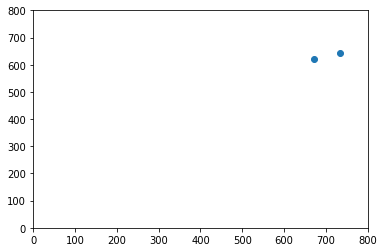

In [215]:
plt.scatter([elb_R_x,wri_R_x],[elb_R_y,wri_R_y])
plt.scatter([elb_L_x,wri_L_x],[elb_L_y,wri_L_y])
plt.xlim([0,800]); plt.ylim([0, 800])

## Process all frames

In [229]:
data_folder / file

WindowsPath('OpenPoseOutput/result.avi')

In [256]:
df = pd.DataFrame()
for file in data_files:
    with open(data_folder / file) as f:
        try:
            data = json.load(f)
        except(UnicodeDecodeError):
            print('cannot parse ',str(file))
    person = 0
    pose = data['people'][person]['pose_keypoints_2d']
    d = {'elbR_x':pose[9], 'elbR_y':pose[10], 'elbR_c':pose[11], 'wriR_x':pose[12], 'wriR_y':pose[13], 'wriR_c':pose[14], 
         'elbL_x':pose[18], 'elbL_y':pose[19], 'elbL_c':pose[20], 'wriL_x':pose[21], 'wriL_y':pose[22], 'wriL_c':pose[23]}
    df = pd.concat((df,pd.DataFrame(d, index=[0])))

cannot parse  result.avi


In [257]:
df.reset_index(drop=True, inplace=True)

In [258]:
t = df.index/25
df.set_index(t, inplace=True)

In [259]:
df.head()

,elbR_x,elbR_y,elbR_c,wriR_x,wriR_y,wriR_c,elbL_x,elbL_y,elbL_c,wriL_x,wriL_y,wriL_c
0.00,700.987,695.037,0.757156,715.604,624.580,0.816592,1195.43,812.790,0.825597,1018.89,895.232,0.692139
0.04,698.030,689.221,0.746408,700.963,630.423,0.776109,1189.72,810.002,0.837186,1012.99,895.231,0.693593
0.08,703.963,680.389,0.602480,692.267,633.310,0.768762,1189.64,809.911,0.845339,1021.69,889.341,0.708843
0.12,721.656,659.765,0.600823,689.162,627.479,0.769042,1189.55,809.961,0.852632,1007.11,898.137,0.695125
0.16,739.206,645.046,0.703967,683.332,627.446,0.748440,1189.52,809.820,0.851107,1015.92,886.518,0.700045


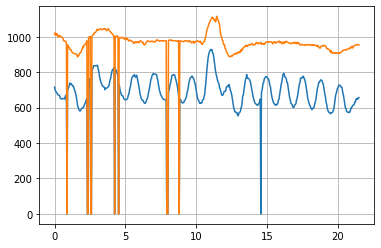

In [268]:
plt.plot(df.wriR_x)
plt.plot(df.wriL_x)
plt.grid()

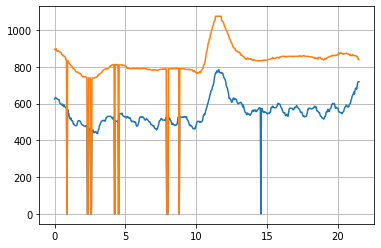

In [273]:
plt.plot(df.wriR_y)
plt.plot(df.wriL_y)
plt.grid()

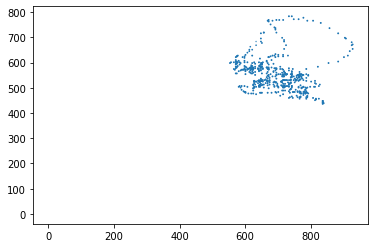

In [265]:
plt.scatter(df.wriR_x, df.wriR_y, df.wriR_c)
# plt.scatter(df.elbR_x, df.elbR_y, df.elbR_c)

(0, 800)

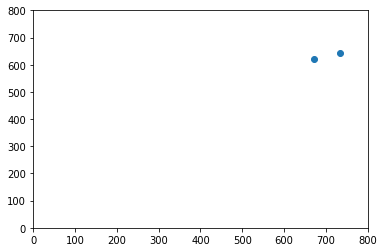

In [203]:
plt.scatter([elb_x,wri_x],[elb_y,wri_y])
plt.xlim([0,800]); plt.ylim([0, 800])

In [163]:
person = 0
hand_r = data['people'][person]['hand_right_keypoints_2d']
hand_l = data['people'][person]['hand_left_keypoints_2d']

In [164]:
print(len(hand_r), len(hand_l))

63 63


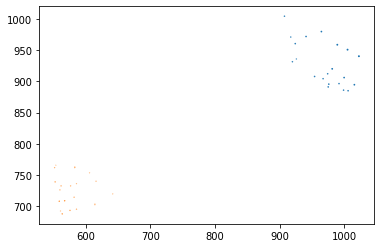

In [166]:
plt.scatter(hand_l[1::3], hand_l[0::3], hand_l[2::3])
plt.scatter(hand_r[1::3], hand_r[0::3], hand_r[2::3])

In [167]:
person = 0
pose = data['people'][person]['pose_keypoints_2d']

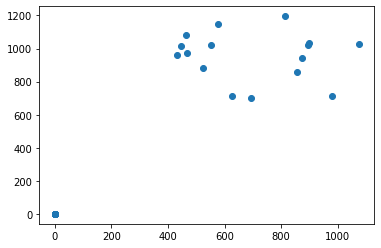

In [169]:
plt.plot(pose[1::3], pose[0::3],'o')


In [41]:
data['people'][1]

{'person_id': [-1],
 'pose_keypoints_2d': [341.974,
  586.155,
  0.85139,
  0,
  0,
  0,
  121.172,
  868.745,
  0.169763,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  356.621,
  521.438,
  0.756104,
  0,
  0,
  0,
  268.268,
  462.658,
  0.816105,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'face_keypoints_2d': [],
 'hand_left_keypoints_2d': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'hand_right_keypoints_2d': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

## Misc

In [94]:
#renaming files 
import shutil

task = 'RamR'
path = 'c:/openpose/output/1054/'
files = glob.glob(path+'Cycle3_'+task+'*')
files = [Path(f) for f in files]
for f in files:
    dest_ = f.as_posix().split('_')[1:]
    dest_.insert(1,'_2_')
    dest_ = ''.join(dest_)
    destination = Path('c:/openpose/output/1054/new/' / Path(dest_))
    dst = shutil.copyfile(f, destination)



In [218]:
path = 'c:/openpose/output/1054/'
files = os.listdir(path)
for f in files:
    ind = f.find('keypoints')
    newfile = f[:ind]+'_'+f[ind:]
    destination = Path('c:/openpose/output/1054_new/'+newfile)
    dst = shutil.copyfile(Path(path+f), destination)
    print(Path(path+f), destination)


c:\openpose\output\1054\RamL_2_000000000000keypoints.json c:\openpose\output\1054_new\RamL_2_000000000000_keypoints.json
c:\openpose\output\1054\RamL_2_000000000001keypoints.json c:\openpose\output\1054_new\RamL_2_000000000001_keypoints.json
c:\openpose\output\1054\RamL_2_000000000002keypoints.json c:\openpose\output\1054_new\RamL_2_000000000002_keypoints.json
c:\openpose\output\1054\RamL_2_000000000003keypoints.json c:\openpose\output\1054_new\RamL_2_000000000003_keypoints.json
c:\openpose\output\1054\RamL_2_000000000004keypoints.json c:\openpose\output\1054_new\RamL_2_000000000004_keypoints.json
c:\openpose\output\1054\RamL_2_000000000005keypoints.json c:\openpose\output\1054_new\RamL_2_000000000005_keypoints.json
c:\openpose\output\1054\RamL_2_000000000006keypoints.json c:\openpose\output\1054_new\RamL_2_000000000006_keypoints.json
c:\openpose\output\1054\RamL_2_000000000007keypoints.json c:\openpose\output\1054_new\RamL_2_000000000007_keypoints.json
c:\openpose\output\1054\RamL_2_0

In [215]:
files[1]

'RamL_2_000000000000keypoints.json'

In [182]:
str2 = files[0]
str2[str2.find('keypoints')]

'k'

In [187]:
str2[:19]+'_'+str2[19:]

'FtnL_2_000000000000_keypoints.json'

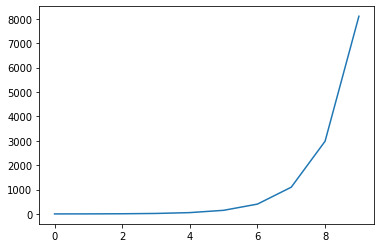

In [2]:
x = np.arange(10)
y = np.exp(x)
plt.plot(x,y)